In [1]:
##Loads libraries

import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Sets a ticker and starting date to grab the data

ticker = 'TSM'
 
## Sets starting date

startyear = 2020
startmonth = 1 
startday = 1
start = dt.datetime(startyear, startmonth, startday)

## Sets today

now = dt.datetime.now()

## Grabs the data

df = pdr.get_data_yahoo(ticker, start, now)

#Shows the data
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-24,114.540001,112.120003,112.260002,113.629997,6653600.0,113.629997
2021-05-25,114.940002,113.599998,114.849998,114.279999,5331700.0,114.279999
2021-05-26,116.000000,114.000000,114.000000,116.000000,6605100.0,116.000000
2021-05-27,116.529999,115.000000,116.000000,115.769997,6513700.0,115.769997
2021-05-28,117.839996,115.949997,116.300003,117.360001,5386500.0,117.360001


In [4]:
## I found this script to calculate 14 day RSI

## initializes new data columns 

df['Up Move'] = np.nan
df['Down Move'] = np.nan
df['Average Up'] = np.nan
df['Average Down'] = np.nan
df['RS'] = np.nan      
df['RSI'] = np.nan

## Calculates Up Move & Down Move
for x in range(1, len(df)):
    df['Up Move'][x] = 0
    df['Down Move'][x] = 0
    
    if df['Adj Close'][x] > df['Adj Close'][x-1]:
        df['Up Move'][x] = df['Adj Close'][x] - df['Adj Close'][x-1]
        
    if df['Adj Close'][x] < df['Adj Close'][x-1]:
        df['Down Move'][x] = abs(df['Adj Close'][x] - df['Adj Close'][x-1])  
        
## Calculates initial Average Up & Down, RS and RSI
df['Average Up'][14] = df['Up Move'][1:15].mean()
df['Average Down'][14] = df['Down Move'][1:15].mean()
df['RS'][14] = df['Average Up'][14] / df['Average Down'][14]
df['RSI'][14] = 100 - (100/(1+df['RS'][14]))

## Calculates rest of Average Up, Average Down, RS, RSI
for x in range(15, len(df)):
    df['Average Up'][x] = (df['Average Up'][x-1]*13+df['Up Move'][x])/14
    df['Average Down'][x] = (df['Average Down'][x-1]*13+df['Down Move'][x])/14
    df['RS'][x] = df['Average Up'][x] / df['Average Down'][x]
    df['RSI'][x] = 100 - (100/(1+df['RS'][x]))
    
## Just looking at it to see the new six columns with the data
print(df)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-01-02   60.119999   59.599998   59.599998   60.040001   8432600.0   
2020-01-03   58.980000   58.040001   58.970001   58.060001  10546400.0   
2020-01-06   57.689999   57.130001   57.599998   57.389999   8897200.0   
2020-01-07   58.599998   56.740002   57.450001   58.320000   7444300.0   
2020-01-08   58.980000   58.110001   58.189999   58.750000   5381500.0   
...                ...         ...         ...         ...         ...   
2021-05-24  114.540001  112.120003  112.260002  113.629997   6653600.0   
2021-05-25  114.940002  113.599998  114.849998  114.279999   5331700.0   
2021-05-26  116.000000  114.000000  114.000000  116.000000   6605100.0   
2021-05-27  116.529999  115.000000  116.000000  115.769997   6513700.0   
2021-05-28  117.839996  115.949997  116.300003  117.360001   5386500.0   

             Adj Close   Up Move  Dow

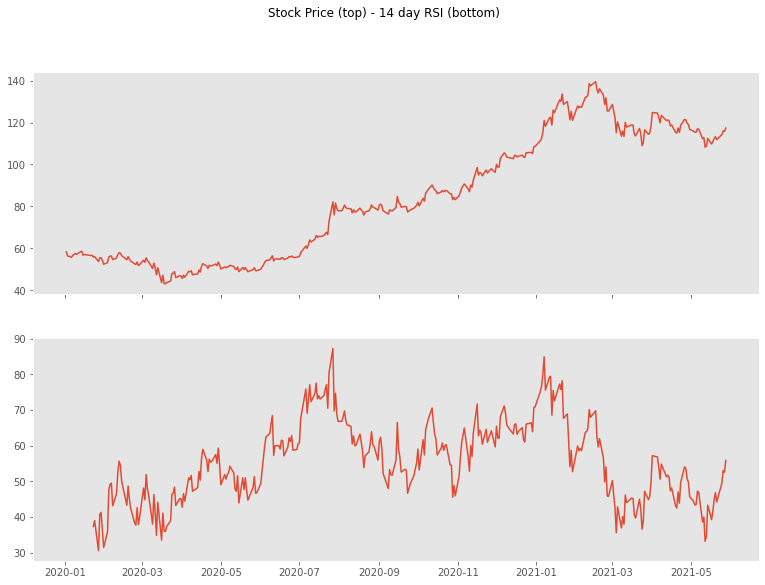

In [6]:
## Plots the Adjusted Close value and the calculated 14 day RSI for each day
plt.style.use('ggplot')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Stock Price (top) - 14 day RSI (bottom)')
axs[0].plot(df['Adj Close'])
axs[1].plot(df['RSI'])
axs[0].grid()
axs[1].grid()

In [7]:
## I found this script to calculate the buy & sell signals using RSI

## Initializes new columns
df['Long Tomorrow'] = np.nan
df['Buy Signal'] = np.nan
df['Sell Signal'] = np.nan
df['Buy RSI'] = np.nan
df['Sell RSI'] = np.nan
df['Strategy'] = np.nan

## Calculates the buy & sell signals (Buy if RSI is below 40 and sell if it is above 70)
for x in range(15, len(df)):
    
    # Calculates "Long Tomorrow" column
    if ((df['RSI'][x] <= 40) & (df['RSI'][x-1]>40) ):
        df['Long Tomorrow'][x] = True
    elif ((df['Long Tomorrow'][x-1] == True) & (df['RSI'][x] <= 70)):
        df['Long Tomorrow'][x] = True
    else:
        df['Long Tomorrow'][x] = False
        
    # Calculates "Buy Signal" column
    if ((df['Long Tomorrow'][x] == True) & (df['Long Tomorrow'][x-1] == False)):
        df['Buy Signal'][x] = df['Adj Close'][x]
        df['Buy RSI'][x] = df['RSI'][x]
        
    # Calculates "Sell Signal" column
    if ((df['Long Tomorrow'][x] == False) & (df['Long Tomorrow'][x-1] == True)):
        df['Sell Signal'][x] = df['Adj Close'][x]
        df['Sell RSI'][x] = df['RSI'][x]



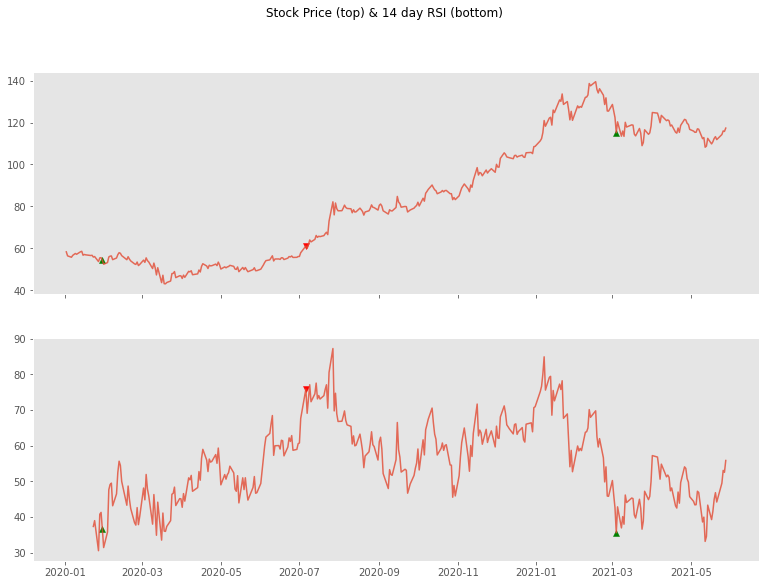

In [8]:
## Plots the historic buy/sell signals

plt.style.use('ggplot')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Stock Price (top) & 14 day RSI (bottom)')

## Plots the stock close price & buy/sell signals:
axs[0].scatter(df.index, df['Buy Signal'],  color = 'green',  marker = '^', alpha = 1)
axs[0].scatter(df.index, df['Sell Signal'],  color = 'red',  marker = 'v', alpha = 1)
axs[0].plot(df['Adj Close'], alpha = 0.8)
axs[0].grid()

## Plots RSI & buy/sell signals:
axs[1].scatter(df.index, df['Buy RSI'],  color = 'green', marker = '^', alpha = 1)
axs[1].scatter(df.index, df['Sell RSI'],  color = 'red', marker = 'v', alpha = 1)
axs[1].plot(df['RSI'], alpha = 0.8)
axs[1].grid()

In [10]:
## Takes the buy and sell signals and stores the Adj Close values to calculate the gain

df['Strategy'][15] = df['Adj Close'][15]
for x in range(16, len(df)):
    if df['Long Tomorrow'][x-1] == True:
        df['Strategy'][x] = df['Strategy'][x-1]* (df['Adj Close'][x] / df['Adj Close'][x-1])
    else:
        df['Strategy'][x] = df['Strategy'][x-1]
        
## Calculates the number of trades
trade_count = df['Buy Signal'].count()

## Calculates the average Profit per trade
average_profit = ((df['Strategy'][-1] / df['Strategy'][15])**(1/trade_count))-1

## Calculates the number of days per/trade
total_days = df['Long Tomorrow'].count()
average_days = int(total_days / trade_count)

## Prints the data
print('Number of trades:', trade_count)
print('Average days per trade', average_days)
print('Average profit per trade', average_profit*100, '%')

Number of trades: 2
Average days per trade 170
Average profit per trade 7.211761876666722 %


In [13]:
## List of ETF 

stonkList = ['TSM','SPY','DIA','QQQ','VTI','VEU','VNQ']

# Defines the start date
startyear = 2020
startmonth = 1 
startday = 1
start = dt.datetime(startyear, startmonth, startday)

# Defines end date
endyear = 2021
endmonth = 5 
endday = 30
end = dt.datetime(endyear,endmonth,endday)

## Calculates the percentage change from end with respect to start

for ticker in stonkList:
    # Gets the data from Yahoo finances
    df = pdr.get_data_yahoo(ticker, start, end)

    #Calculates the performance of the ticker
    iniPrc = df['Adj Close'][0] 
    endPrc = df['Adj Close'][-1]
    indPer = ((df['Adj Close'][-1] - df['Adj Close'][0] ) / df['Adj Close'][0] )

    #Prints the performance
    print('From', start,' to ', end,',', ticker, 'changed', indPer*100, '%' )

From 2020-01-01 00:00:00  to  2021-05-30 00:00:00 , TSM changed 101.42497740900652 %
From 2020-01-01 00:00:00  to  2021-05-30 00:00:00 , SPY changed 32.140743307288 %
From 2020-01-01 00:00:00  to  2021-05-30 00:00:00 , DIA changed 23.189663405010585 %
From 2020-01-01 00:00:00  to  2021-05-30 00:00:00 , QQQ changed 55.55852993436234 %
From 2020-01-01 00:00:00  to  2021-05-30 00:00:00 , VTI changed 34.99325824528502 %
From 2020-01-01 00:00:00  to  2021-05-30 00:00:00 , VEU changed 21.00855644652257 %
From 2020-01-01 00:00:00  to  2021-05-30 00:00:00 , VNQ changed 14.177847468733045 %
